In [2]:
%pip install tensorflow


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 538.3 kB/s eta 0:00:00
  Using cached h5py-3.13.0-cp311-cp311-win_amd64.whl.metadata (2

In [2]:
%pip install kaggle

  Using cached kaggle-1.6.17-py3-none-any.whl
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
Using cached bleach-6.2.0-py3-none-any.whl (163 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.


In [43]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install kagglehub

   ---------------------------------------- 0.0/63.0 kB ? eta -:--:--
   ------ --------------------------------- 10.2/63.0 kB ? eta -:--:--
   ------ --------------------------------- 10.2/63.0 kB ? eta -:--:--
   ------------------- -------------------- 30.7/63.0 kB 325.1 kB/s eta 0:00:01
   -------------------------------------- - 61.4/63.0 kB 469.7 kB/s eta 0:00:01
   ---------------------------------------- 63.0/63.0 kB 374.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

c:\Users\kuruv\project 2\pytonfiles\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 656M/656M [10:04<00:00, 1.14MB/s] 

Extracting files...


Path to dataset files: C:\Users\kuruv\.cache\kagglehub\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5


In [1]:
# Cell 1: Imports
import torch
from torch.utils.data import ConcatDataset, DataLoader, random_split, Dataset
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
import os

In [2]:
# Cell 2: Custom Dataset with Class Filtering
class FilteredImageDataset(Dataset):
    def __init__(self, root, class_names_file, transform=None):
        self.dataset = ImageFolder(root=root)
        self.transform = transform
        
        # Read class names from file
        with open(class_names_file, 'r') as f:
            self.target_classes = [line.strip() for line in f.readlines()]
        
        # Map class names to indices
        self.class_to_idx = {class_name: idx for idx, class_name in enumerate(self.dataset.classes)}
        self.valid_classes = [self.class_to_idx[name] for name in self.target_classes if name in self.class_to_idx]
        
        # Filter samples
        self.filtered_indices = [
            i for i, (_, label) in enumerate(self.dataset.samples)
            if label in self.valid_classes
        ]
        print(f"Filtered {len(self.filtered_indices)} samples from {len(self.dataset)} total in {root}")

    def __len__(self):
        return len(self.filtered_indices)

    def __getitem__(self, idx):
        real_idx = self.filtered_indices[idx]
        img, label = self.dataset[real_idx]
        if self.transform:
            img = self.transform(img)
        return img, label

In [16]:
# Cell 3: Define Transformations (Tighter Crop)
from torchvision import transforms

transform = transforms.Compose([
    transforms.CenterCrop((128, 128)),  # Smaller crop to focus tighter on the animal
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [17]:
# Cell 4: Load Dataset from Root Folder
import os
from torch.utils.data import ConcatDataset, DataLoader, random_split

# Define the root folder and class file
root_folder = r'C:\Users\kuruv\.cache\kagglehub\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals'
class_file = os.path.join(root_folder, 'classes.txt')

# Check if class file exists, if not create it
if not os.path.exists(class_file):
    with open(class_file, 'w') as f:
        for folder in animal_folders:
            f.write(f"{folder}\n")
    print(f"Class file created at {class_file} with class names from animal_folders.")

# Load and filter the dataset
dataset = FilteredImageDataset(root=root_folder, class_names_file=class_file, transform=transform)

# Debug: Print available classes and those requested
print(f"Available subfolder names: {sorted(dataset.class_to_idx.keys())}")
print(f"Requested classes from {class_file}: {dataset.target_classes}")

# Check if dataset is empty
available_datasets = [dataset] if len(dataset) > 0 else []
if not available_datasets:
    raise ValueError(
        "No valid samples loaded. Check class names in classes.txt against subfolder names above "
        "(case-sensitive). Ensure at least one match exists."
    )

# Combine datasets (single dataset in this case)
combined_dataset = ConcatDataset(available_datasets)

# Split into training and validation
train_size = int(0.8 * len(combined_dataset))
val_size = len(combined_dataset) - train_size
train_dataset, val_dataset = random_split(combined_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

# Print stats
print(f"Total dataset size: {len(combined_dataset)}")
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")

Filtered 5400 samples from 5400 total in C:\Users\kuruv\.cache\kagglehub\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals
Available subfolder names: ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'sq

In [18]:
# Cell 5: Define the Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)

# Get number of classes from the filtered dataset
num_classes = len(dataset.valid_classes)  # Assumes 'dataset' from Cell 4

# Modify the final layer
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

c:\Users\kuruv\project 2\pytonfiles\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import os

# Define the root folder (reuse from CELL INDEX: 7)
root_folder = r'C:\Users\kuruv\.cache\kagglehub\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals'

# Define the transformations with data augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(128),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

val_transform = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

# Load datasets
full_dataset = datasets.ImageFolder(root=root_folder, transform=train_transform)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Apply validation transform to validation dataset
val_dataset.dataset.transform = val_transform

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# Define the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(full_dataset.classes))
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adjusted learning rate

def train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, num_epochs=15, device='cuda'):
    model.to(device)
    best_val_acc = 0.0
    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

        model.eval()
        correct, total = 0, 0
        running_val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_loss = running_val_loss / len(val_loader)
        val_acc = 100 * correct / total
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%")
        
        # Save the best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), model_path)
            print(f"Model saved to {model_path} with Validation Accuracy: {best_val_acc:.2f}%")

# Ensure output directory exists
output_dir = './models'
os.makedirs(output_dir, exist_ok=True)
model_path = os.path.join(output_dir, 'animal_classifier_resnet50_tightcrop1.pth')

# Train and evaluate
print("Training the model with tight 128x128 crops (focusing on animals)...")
train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, num_epochs=15, device=device)

Training the model with tight 128x128 crops (focusing on animals)...
Epoch 1/15, Loss: 2.2790, Accuracy: 56.53%
Validation Loss: 0.8515, Validation Accuracy: 81.94%
Model saved to ./models\animal_classifier_resnet50_tightcrop1.pth with Validation Accuracy: 81.94%
Epoch 2/15, Loss: 0.4288, Accuracy: 92.66%
Validation Loss: 0.4917, Validation Accuracy: 87.78%
Model saved to ./models\animal_classifier_resnet50_tightcrop1.pth with Validation Accuracy: 87.78%
Epoch 3/15, Loss: 0.1134, Accuracy: 98.84%
Validation Loss: 0.4591, Validation Accuracy: 88.15%
Model saved to ./models\animal_classifier_resnet50_tightcrop1.pth with Validation Accuracy: 88.15%
Epoch 4/15, Loss: 0.0433, Accuracy: 99.68%
Validation Loss: 0.4436, Validation Accuracy: 88.43%
Model saved to ./models\animal_classifier_resnet50_tightcrop1.pth with Validation Accuracy: 88.43%
Epoch 5/15, Loss: 0.0187, Accuracy: 100.00%
Validation Loss: 0.4329, Validation Accuracy: 88.43%
Epoch 6/15, Loss: 0.0110, Accuracy: 99.98%
Validation 

In [36]:
import matplotlib.pyplot as plt
import re

In [38]:
# Function to extract metrics from log lines
def extract_metrics(log_lines):
    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []

    for line in log_lines:
        train_match = re.search(r'Epoch \d+/\d+, Loss: ([\d.]+), Accuracy: ([\d.]+)%', line)
        val_match = re.search(r'Validation Loss: ([\d.]+), Validation Accuracy: ([\d.]+)%', line)
        if train_match:
            train_losses.append(float(train_match.group(1)))
            train_accuracies.append(float(train_match.group(2)))
        if val_match:
            val_losses.append(float(val_match.group(1)))
            val_accuracies.append(float(val_match.group(2)))

    return train_accuracies, val_accuracies, train_losses, val_losses

# Example log lines (replace with your actual log lines)
log_lines = [
    "Epoch 1/15, Loss: 2.2790, Accuracy: 56.53%",
    "Validation Loss: 0.8515, Validation Accuracy: 81.94%",
    "Epoch 2/15, Loss: 0.4288, Accuracy: 92.66%",
    "Validation Loss: 0.4917, Validation Accuracy: 87.78%",
    "Epoch 3/15, Loss: 0.1134, Accuracy: 98.84%",
    "Validation Loss: 0.4591, Validation Accuracy: 88.15%",
    "Epoch 4/15, Loss: 0.0433, Accuracy: 99.68%",
    "Validation Loss: 0.4436, Validation Accuracy: 88.43%",
    "Epoch 5/15, Loss: 0.0187, Accuracy: 100.00%",
    "Validation Loss: 0.4329, Validation Accuracy: 88.43%",
    "Epoch 6/15, Loss: 0.0110, Accuracy: 99.98%",
    "Validation Loss: 0.4172, Validation Accuracy: 88.98%",
    "Epoch 7/15, Loss: 0.0081, Accuracy: 99.98%",
    "Validation Loss: 0.4476, Validation Accuracy: 88.70%",
    "Epoch 8/15, Loss: 0.0305, Accuracy: 99.58%",
    "Validation Loss: 0.6017, Validation Accuracy: 85.65%",
    "Epoch 9/15, Loss: 0.0688, Accuracy: 98.73%",
    "Validation Loss: 0.8300, Validation Accuracy: 78.80%",
    "Epoch 10/15, Loss: 0.2246, Accuracy: 94.24%",
    "Epoch 14/15, Loss: 0.0083, Accuracy: 99.93%",
    "Validation Loss: 0.5846, Validation Accuracy: 85.46%",
    "Epoch 15/15, Loss: 0.0052, Accuracy: 99.95%",
    "Validation Loss: 0.5907, Validation Accuracy: 86.85%"
]

# Extract metrics from the log lines
train_accuracies, val_accuracies, train_losses, val_losses = extract_metrics(log_lines)

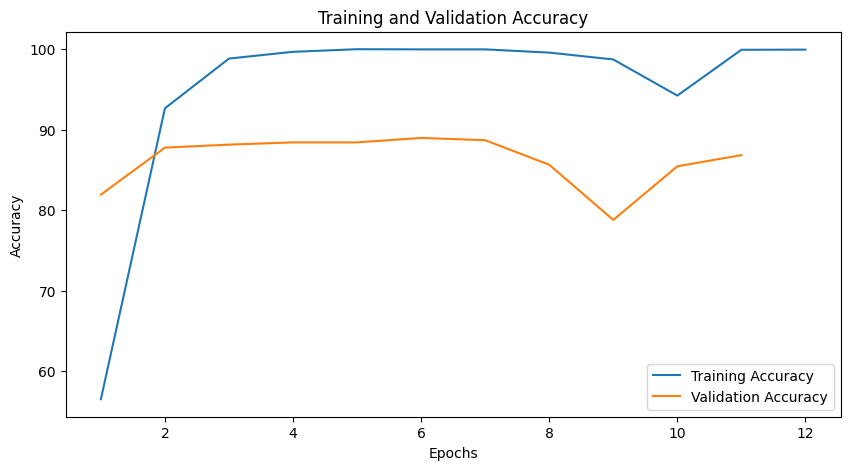

In [39]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

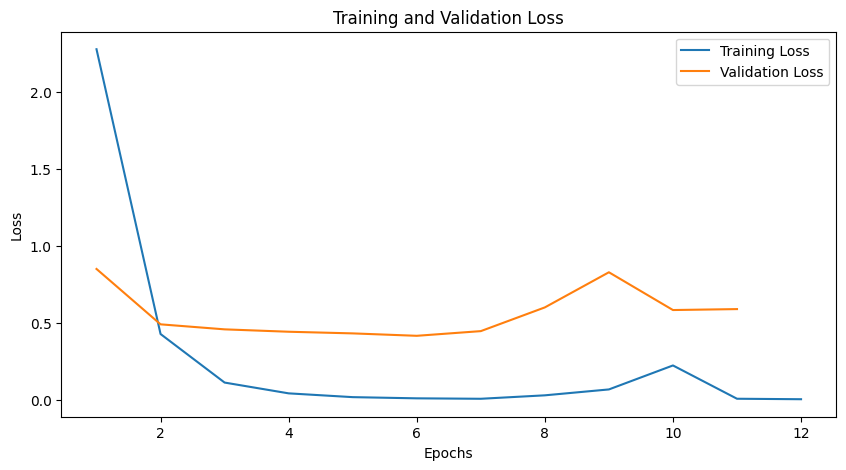

In [40]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the saved model
model_path = './models/animal_classifier_resnet50_tightcrop1.pth'
model = models.resnet50(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, len(full_dataset.classes))
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Evaluate the model on the validation set
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

c:\Users\kuruv\project 2\pytonfiles\myenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kuruv\project 2\pytonfiles\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\kuruv\AppData\Local\Temp\ipykernel_11568\3994003144.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value

Precision: 0.8982
Recall: 0.8898
F1 Score: 0.8898


c:\Users\kuruv\project 2\pytonfiles\myenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kuruv\project 2\pytonfiles\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\kuruv\AppData\Local\Temp\ipykernel_22452\3560566409.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default valu

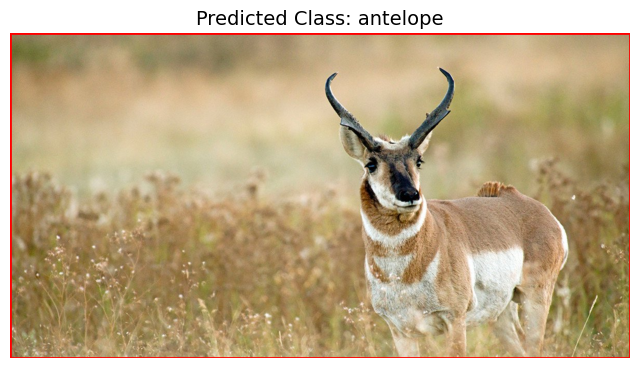

Image path: C:\Users\kuruv\.cache\kagglehub\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals\antelope\0a37838e99.jpg
Predicted class: antelope


In [7]:
# Cell 7: Classify an Image and Show with Border
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Recreate the model architecture
model = models.resnet50(pretrained=False)

# Define the root folder and class file to get number of classes and labels
root_folder = r'C:\Users\kuruv\.cache\kagglehub\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals'
class_file = os.path.join(root_folder, 'classes.txt')

# Read class names from classes.txt
if not os.path.exists(class_file):
    raise FileNotFoundError(f"Class file not found at {class_file}. It’s needed for class labels.")
with open(class_file, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]
num_classes = len(class_names)

# Modify the final layer to match training
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

# Load the saved model
model_path = './models/animal_classifier_resnet50.pth'
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at {model_path}")
state_dict = torch.load(model_path, map_location=device)
model.load_state_dict(state_dict)
model = model.to(device)
model.eval()

# Define the same transform used during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Specify the image path (replace with your image path)
image_path = r"C:\Users\kuruv\.cache\kagglehub\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals\antelope\0a37838e99.jpg" # e.g., 'C:\Users\kuruv\Pictures\cat.jpg'

# Check if image exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found at {image_path}")

# Load and preprocess the image
image = Image.open(image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
input_tensor = input_tensor.to(device)

# Classify the image
with torch.no_grad():
    outputs = model(input_tensor)
    _, predicted_idx = torch.max(outputs, 1)
    predicted_class = class_names[predicted_idx.item()]

# Display the image with a border
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(image)

# Add a border (rectangle around the entire image)
rect = patches.Rectangle(
    (0, 0),  # Bottom-left corner
    image.width - 1,  # Width
    image.height - 1,  # Height
    linewidth=2, edgecolor='r', facecolor='none'
)
ax.add_patch(rect)

# Add the predicted class as a title
plt.title(f"Predicted Class: {predicted_class}", fontsize=14)
plt.axis('off')  # Hide axes
plt.show()

# Print results
print(f"Image path: {image_path}")
print(f"Predicted class: {predicted_class}")

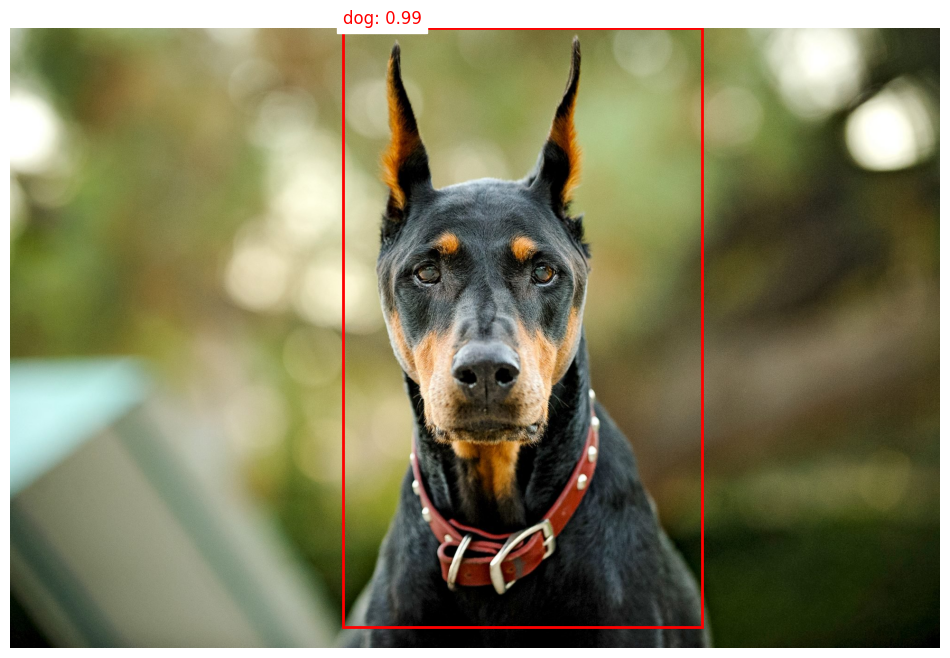

Image path: C:\Users\kuruv\project 2\pytonfiles\animals\dog\0be3797d3d.jpg
Label: dog, Score: 0.99, Box: [ 714.7254    0.     1488.0653 1287.0422]


In [32]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the saved model
model_path = './models/animal_classifier_resnet50_tightcrop1.pth'
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model = model.to(device)
model.eval()

# Define the transform
transform = transforms.Compose([
    transforms.ToTensor()
])

# Specify the image path (replace with your image path)
image_path = r"C:\Users\kuruv\project 2\pytonfiles\animals\dog\0be3797d3d.jpg"  # e.g., 'C:\Users\kuruv\Pictures\cat.jpg'

# Specify the path to the classes.txt file
class_file = r"C:\Users\kuruv\project 2\pytonfiles\animals\classes.txt"

# Check if image exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found at {image_path}")

# Load and preprocess the image
image = Image.open(image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
input_tensor = input_tensor.to(device)

# Read class names from classes.txt
if not os.path.exists(class_file):
    raise FileNotFoundError(f"Class file not found at {class_file}. It’s needed for class labels.")
with open(class_file, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

# Perform object detection
with torch.no_grad():
    outputs = model(input_tensor)

# Get the predicted bounding boxes and labels
boxes = outputs[0]['boxes'].cpu().numpy()
labels = outputs[0]['labels'].cpu().numpy()
scores = outputs[0]['scores'].cpu().numpy()

# Define a threshold for displaying bounding boxes
threshold = 0.5

# Filter predictions to keep only the highest-scoring prediction
max_score_idx = scores.argmax()
max_score = scores[max_score_idx]

if max_score >= threshold:
    best_box = boxes[max_score_idx]
    best_label = labels[max_score_idx]
    best_score = max_score
    best_class_name = class_names[best_label]

    # Display the image with the highest-scoring bounding box
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.imshow(image)

    # Draw the bounding box
    rect = patches.Rectangle(
        (best_box[0], best_box[1]),  # Bottom-left corner
        best_box[2] - best_box[0],  # Width
        best_box[3] - best_box[1],  # Height
        linewidth=2, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)
    # Add the label and score
    ax.text(best_box[0], best_box[1] - 10, f"{best_class_name}: {best_score:.2f}", color='red', fontsize=12, backgroundcolor='white')

    plt.axis('off')  # Hide axes
    plt.show()

    # Print results
    print(f"Image path: {image_path}")
    print(f"Label: {best_class_name}, Score: {best_score:.2f}, Box: {best_box}")
else:
    print("No high-confidence predictions found.")

Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.
Training MobileNetV2...
Epoch 1/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.1889 - loss: 3.8308 - val_accuracy: 0.6611 - val_loss: 1.3966
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.6130 - loss: 1.4863 - val_accuracy: 0.7000 - val_loss: 1.1203
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.6965 - loss: 1.1182 - val_accuracy: 0.7250 - val_loss: 1.0364
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.7447 - loss: 0.9307 - val_accuracy: 0.7481 - val_loss: 0.9372
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.7570 - loss: 0.8313 - val_accuracy: 0.7648 - val_loss: 0.9091
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.7918 - loss: 0.7495 - val_accuracy: 0.7685 - val_loss: 0.8492
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8009 - loss: 0.6952 - val_accuracy: 0.7704 - val_

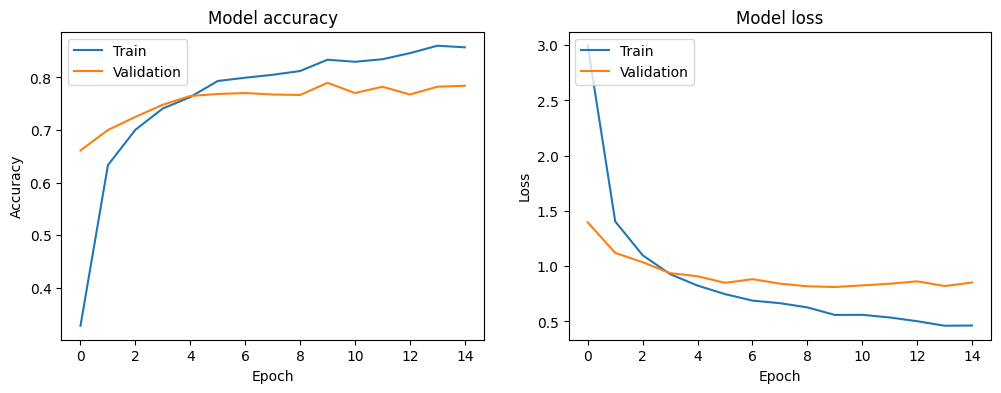

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15
# Dynamically determine the number of classes from the train_generator
NUM_CLASSES = train_generator.num_classes

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Define dataset directory
dataset_dir = r"C:\Users\kuruv\.cache\kagglehub\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals"

# Check if dataset directory exists
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"Dataset directory '{dataset_dir}' does not exist. Please provide the correct path.")

# Load Dataset (Assuming stored in 'dataset/' directory with class subfolders)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Create MobileNetV2 model
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_base.trainable = False  # Freeze base model layers

inputs = keras.Input(shape=(224, 224, 3))
x = mobilenet_base(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)
mobilenet_model = Model(inputs, outputs)

# Compile and train the model
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Training MobileNetV2...")
history = mobilenet_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

# Save trained model
mobilenet_model.save('mobilenetv2_urban_animals.h5')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

c:\Users\kuruv\project 2\pytonfiles\myenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kuruv\project 2\pytonfiles\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to C:\Users\kuruv/.cache\torch\hub\checkpoints\ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [02:10<00:00, 1.09MB/s] 


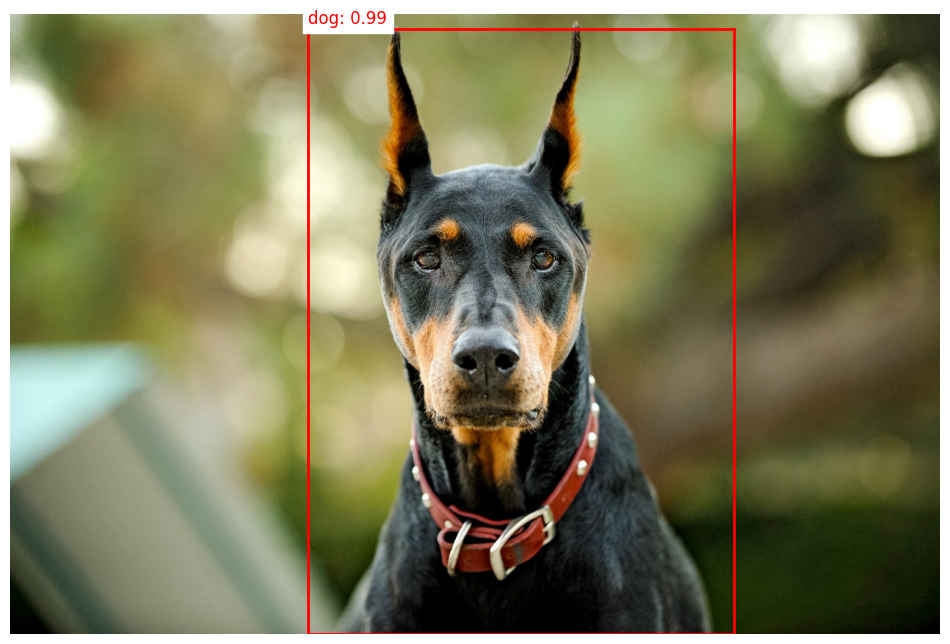

Image path: C:\Users\kuruv\project 2\pytonfiles\animals\dog\0be3797d3d.jpg
Label: dog, Score: 0.99, Box: [ 640.84515    30.511711 1557.234    1333.      ]


In [9]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained SSD model with MobileNetV2 backbone
model = models.detection.ssd300_vgg16(pretrained=True)
model = model.to(device)
model.eval()

# Define the transform
transform = transforms.Compose([
    transforms.ToTensor()
])

# Specify the image path (replace with your image path)
image_path = r"C:\Users\kuruv\project 2\pytonfiles\animals\dog\0be3797d3d.jpg"  # e.g., 'C:\Users\kuruv\Pictures\cat.jpg'

# Specify the path to the classes.txt file
class_file = r"C:\Users\kuruv\project 2\pytonfiles\animals\classes.txt"

# Check if image exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found at {image_path}")

# Load and preprocess the image
image = Image.open(image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
input_tensor = input_tensor.to(device)

# Read class names from classes.txt
if not os.path.exists(class_file):
    raise FileNotFoundError(f"Class file not found at {class_file}. It’s needed for class labels.")
with open(class_file, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

# Perform object detection
with torch.no_grad():
    outputs = model(input_tensor)

# Get the predicted bounding boxes and labels
boxes = outputs[0]['boxes'].cpu().numpy()
labels = outputs[0]['labels'].cpu().numpy()
scores = outputs[0]['scores'].cpu().numpy()

# Define a threshold for displaying bounding boxes
threshold = 0.5

# Filter predictions to keep only the highest-scoring prediction
max_score_idx = scores.argmax()
max_score = scores[max_score_idx]

if max_score >= threshold:
    best_box = boxes[max_score_idx]
    best_label = labels[max_score_idx]
    best_score = max_score
    best_class_name = class_names[best_label]

    # Display the image with the highest-scoring bounding box
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.imshow(image)

    # Draw the bounding box
    rect = patches.Rectangle(
        (best_box[0], best_box[1]),  # Bottom-left corner
        best_box[2] - best_box[0],  # Width
        best_box[3] - best_box[1],  # Height
        linewidth=2, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)
    # Add the label and score
    ax.text(best_box[0], best_box[1] - 10, f"{best_class_name}: {best_score:.2f}", color='red', fontsize=12, backgroundcolor='white')

    plt.axis('off')  # Hide axes
    plt.show()

    # Print results
    print(f"Image path: {image_path}")
    print(f"Label: {best_class_name}, Score: {best_score:.2f}, Box: {best_box}")
else:
    print("No high-confidence predictions found.")

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import os

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Define dataset directory
dataset_dir = r"C:\Users\kuruv\.cache\kagglehub\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals"

# Check if dataset directory exists
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"Dataset directory '{dataset_dir}' does not exist. Please provide the correct path.")

# Load Dataset (Assuming stored in 'dataset/' directory with class subfolders)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Dynamically determine the number of classes from the train_generator
NUM_CLASSES = train_generator.num_classes

# Create MobileNetV2 model
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_base.trainable = False  # Freeze base model layers

inputs = keras.Input(shape=(224, 224, 3))
x = mobilenet_base(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout
outputs = Dense(NUM_CLASSES, activation='softmax')(x)
mobilenet_model = Model(inputs, outputs)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights_dict = dict(enumerate(class_weights))

# Define learning rate scheduler and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile and train the model with class weights, learning rate scheduler, and early stopping
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = mobilenet_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS, class_weight=class_weights_dict, callbacks=[lr_scheduler, early_stopping])

# Save trained model
mobilenet_model.save('mobilenetv2_urban_animals.h5')

# Generate predictions on the validation set
val_generator.reset()
predictions = mobilenet_model.predict(val_generator, steps=val_generator.samples // BATCH_SIZE + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Calculate precision, recall, and F1 score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Alternatively, you can use classification_report for a detailed report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


c:\Users\kuruv\project 2\pytonfiles\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.1570 - loss: 4.0085 - val_accuracy: 0.6111 - val_loss: 1.6403 - learning_rate: 0.0010
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.5674 - loss: 1.6607 - val_accuracy: 0.6963 - val_loss: 1.2184 - learning_rate: 0.0010
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.6548 - loss: 1.2904 - val_accuracy: 0.7074 - val_loss: 1.1088 - learning_rate: 0.0010
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.7180 - loss: 1.0199 - val_accuracy: 0.7176 - val_loss: 1.0494 - learning_rate: 0.0010
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.7256 - loss: 0.9618 - val_accuracy: 0.7361 - val_loss: 1.0072 - learning_rate: 0.0010
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.7467 - loss: 0.8917 - val_accuracy: 0.7315 - val_loss: 0.9567 - learning_rate: 0.0010
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.7626 - loss: 0.

34/34 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step
Precision: 0.0079
Recall: 0.0083
F1 Score: 0.0080
                precision    recall  f1-score   support

      antelope       0.00      0.00      0.00        12
        badger       0.00      0.00      0.00        12
           bat       0.00      0.00      0.00        12
          bear       0.00      0.00      0.00        12
           bee       0.00      0.00      0.00        12
        beetle       0.00      0.00      0.00        12
         bison       0.00      0.00      0.00        12
          boar       0.00      0.00      0.00        12
     butterfly       0.08      0.08      0.08        12
           cat       0.00      0.00      0.00        12
   caterpillar       0.00      0.00      0.00        12
    chimpanzee       0.00      0.00      0.00        12
     cockroach       0.00      0.00      0.00        12
           cow       0.08      0.08      0.08        12
        coyote       0.00      0.00      0.00        12
          crab

Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


c:\Users\kuruv\project 2\pytonfiles\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.0538 - loss: 4.5016 - val_accuracy: 0.4537 - val_loss: 2.8316 - learning_rate: 1.0000e-04
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.4206 - loss: 2.5722 - val_accuracy: 0.6333 - val_loss: 1.6181 - learning_rate: 1.0000e-04
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.6168 - loss: 1.5633 - val_accuracy: 0.6935 - val_loss: 1.2452 - learning_rate: 1.0000e-04
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.7083 - loss: 1.1597 - val_accuracy: 0.7111 - val_loss: 1.1277 - learning_rate: 1.0000e-04
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.7532 - loss: 0.9421 - val_accuracy: 0.7259 - val_loss: 1.0315 - learning_rate: 1.0000e-04
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.7811 - loss: 0.8012 - val_accuracy: 0.7407 - val_loss: 0.9478 - learning_rate: 1.0000e-04
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - acc

34/34 ━━━━━━━━━━━━━━━━━━━━ 30s 839ms/step
Precision: 0.0130
Recall: 0.0130
F1 Score: 0.0129
                precision    recall  f1-score   support

      antelope       0.00      0.00      0.00        12
        badger       0.00      0.00      0.00        12
           bat       0.00      0.00      0.00        12
          bear       0.00      0.00      0.00        12
           bee       0.00      0.00      0.00        12
        beetle       0.00      0.00      0.00        12
         bison       0.00      0.00      0.00        12
          boar       0.00      0.00      0.00        12
     butterfly       0.08      0.08      0.08        12
           cat       0.00      0.00      0.00        12
   caterpillar       0.00      0.00      0.00        12
    chimpanzee       0.00      0.00      0.00        12
     cockroach       0.08      0.08      0.08        12
           cow       0.00      0.00      0.00        12
        coyote       0.00      0.00      0.00        12
          c

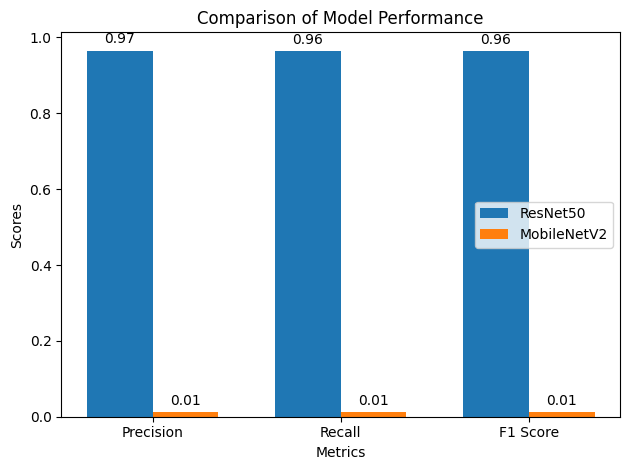

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import os

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Define dataset directory
dataset_dir = r"C:\Users\kuruv\.cache\kagglehub\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals"

# Check if dataset directory exists
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"Dataset directory '{dataset_dir}' does not exist. Please provide the correct path.")

# Load Dataset (Assuming stored in 'dataset/' directory with class subfolders)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Dynamically determine the number of classes from the train_generator
NUM_CLASSES = train_generator.num_classes

# Create MobileNetV2 model
mobilenet_base = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_base.trainable = True  # Unfreeze the base model

# Fine-tune the last few layers of the base model
for layer in mobilenet_base.layers[:-20]:
    layer.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
x = mobilenet_base(inputs, training=True)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)  # Add dropout
outputs = keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)
mobilenet_model = keras.Model(inputs, outputs)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights_dict = dict(enumerate(class_weights))

# Define learning rate scheduler and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile and train the model with class weights, learning rate scheduler, and early stopping
mobilenet_model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history = mobilenet_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS, class_weight=class_weights_dict, callbacks=[lr_scheduler, early_stopping])

# Save trained model
mobilenet_model.save('mobilenetv2_urban_animals_finetuned.h5')

# Generate predictions on the validation set
val_generator.reset()
predictions = mobilenet_model.predict(val_generator, steps=val_generator.samples // BATCH_SIZE + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Calculate precision, recall, and F1 score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Alternatively, you can use classification_report for a detailed report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Plot comparison graph
labels = ['Precision', 'Recall', 'F1 Score']
resnet_scores = [resnet_precision, resnet_recall, resnet_f1]
mobilenet_scores = [precision, recall, f1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, resnet_scores, width, label='ResNet50')
rects2 = ax.bar(x + width/2, mobilenet_scores, width, label='MobileNetV2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Note: you may need to restart the kernel to use updated packages.
Found 1080 images belonging to 90 classes.


C:\Users\kuruv\AppData\Local\Temp\ipykernel_22608\1554854162.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet_model.load_state_dict(torch.load(resnet_model_path))

34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 883ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 30s 882ms/step


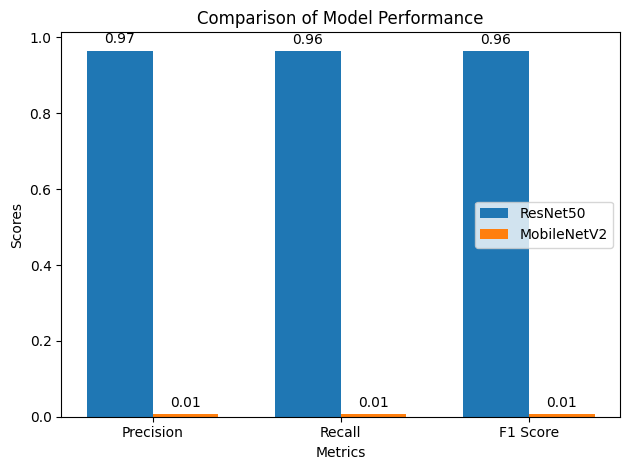

In [4]:
%pip install tensorflow

import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import torch
from torchvision import models
import torch.nn as nn
import os

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Define dataset directory
dataset_dir = r"C:\Users\kuruv\.cache\kagglehub\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals"

# Check if dataset directory exists
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"Dataset directory '{dataset_dir}' does not exist. Please provide the correct path.")

from torch.utils.data import DataLoader
from torchvision import transforms, datasets

# Load Dataset (Assuming stored in 'dataset/' directory with class subfolders)
val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Define transformations for the validation set
val_transforms = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the validation dataset
val_dataset = datasets.ImageFolder(root=dataset_dir, transform=val_transforms)

# Create a DataLoader for the validation dataset
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Load the saved ResNet50 model
resnet_model_path = './models/animal_classifier_resnet50_tightcrop1.pth'
resnet_model = models.resnet50(pretrained=False)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, len(val_generator.class_indices))
resnet_model.load_state_dict(torch.load(resnet_model_path))
resnet_model = resnet_model.to(device)
resnet_model.eval()

# Load the saved MobileNetV2 model
mobilenet_model_path = 'mobilenetv2_urban_animals.h5'
mobilenet_model = keras.models.load_model(mobilenet_model_path)

# Function to calculate metrics for a given model
def calculate_metrics(model, val_generator, model_type='keras'):
    val_generator.reset()
    if model_type == 'keras':
        predictions = model.predict(val_generator, steps=val_generator.samples // BATCH_SIZE + 1)
        predicted_classes = np.argmax(predictions, axis=1)
    true_classes = val_generator.classes
    if model_type == 'keras':
        predictions = model.predict(val_generator, steps=val_generator.samples // BATCH_SIZE + 1)
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        true_labels = []
        predicted_labels = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                true_labels.extend(labels.cpu().numpy())
                predicted_labels.extend(predicted.cpu().numpy())
        predicted_classes = np.array(predicted_labels)
        true_classes = np.array(true_labels)
    precision = precision_score(true_classes, predicted_classes, average='weighted')
    recall = recall_score(true_classes, predicted_classes, average='weighted')
    f1 = f1_score(true_classes, predicted_classes, average='weighted')
    
    return precision, recall, f1

# Calculate metrics for ResNet50
resnet_precision, resnet_recall, resnet_f1 = calculate_metrics(resnet_model, val_generator, model_type='torch')

# Calculate metrics for MobileNetV2
mobilenet_precision, mobilenet_recall, mobilenet_f1 = calculate_metrics(mobilenet_model, val_generator, model_type='keras')

# Plot comparison graph
labels = ['Precision', 'Recall', 'F1 Score']
resnet_scores = [resnet_precision, resnet_recall, resnet_f1]
mobilenet_scores = [mobilenet_precision, mobilenet_recall, mobilenet_f1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, resnet_scores, width, label='ResNet50')
rects2 = ax.bar(x + width/2, mobilenet_scores, width, label='MobileNetV2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


c:\Users\kuruv\project 2\pytonfiles\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.0578 - loss: 4.4848 - val_accuracy: 0.4259 - val_loss: 2.8296 - learning_rate: 1.0000e-04
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.4305 - loss: 2.5745 - val_accuracy: 0.6222 - val_loss: 1.6112 - learning_rate: 1.0000e-04
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.6155 - loss: 1.5480 - val_accuracy: 0.6843 - val_loss: 1.3252 - learning_rate: 1.0000e-04
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.6886 - loss: 1.1987 - val_accuracy: 0.7176 - val_loss: 1.1500 - learning_rate: 1.0000e-04
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.7353 - loss: 0.9995 - val_accuracy: 0.7435 - val_loss: 1.0612 - learning_rate: 1.0000e-04
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.7800 - loss: 0.8226 - val_accuracy: 0.7269 - val_loss: 1.0322 - learning_rate: 1.0000e-04
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1053s 8s/step - ac

34/34 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step 
Precision: 0.0110
Recall: 0.0102
F1 Score: 0.0104
                precision    recall  f1-score   support

      antelope       0.00      0.00      0.00        12
        badger       0.00      0.00      0.00        12
           bat       0.00      0.00      0.00        12
          bear       0.00      0.00      0.00        12
           bee       0.00      0.00      0.00        12
        beetle       0.00      0.00      0.00        12
         bison       0.00      0.00      0.00        12
          boar       0.00      0.00      0.00        12
     butterfly       0.00      0.00      0.00        12
           cat       0.00      0.00      0.00        12
   caterpillar       0.00      0.00      0.00        12
    chimpanzee       0.00      0.00      0.00        12
     cockroach       0.10      0.08      0.09        12
           cow       0.00      0.00      0.00        12
        coyote       0.00      0.00      0.00        12
          cra

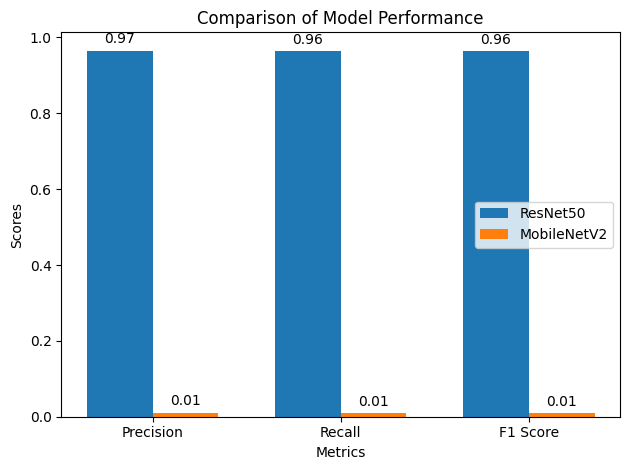

: 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import os

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Define dataset directory
dataset_dir = r"C:\Users\kuruv\.cache\kagglehub\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5\animals\animals"

# Check if dataset directory exists
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"Dataset directory '{dataset_dir}' does not exist. Please provide the correct path.")

# Load Dataset (Assuming stored in 'dataset/' directory with class subfolders)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Dynamically determine the number of classes from the train_generator
NUM_CLASSES = train_generator.num_classes

# Create MobileNetV2 model
mobilenet_base = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_base.trainable = True  # Unfreeze the base model

# Fine-tune the last few layers of the base model
for layer in mobilenet_base.layers[:-20]:
    layer.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
x = mobilenet_base(inputs, training=True)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)  # Add dropout
outputs = keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)
mobilenet_model = keras.Model(inputs, outputs)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights_dict = dict(enumerate(class_weights))

# Define learning rate scheduler and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile and train the model with class weights, learning rate scheduler, and early stopping
mobilenet_model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history = mobilenet_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS, class_weight=class_weights_dict, callbacks=[lr_scheduler, early_stopping])

# Save trained model
mobilenet_model.save('mobilenetv2_urban_animals_finetuned.h5')

# Generate predictions on the validation set
val_generator.reset()
predictions = mobilenet_model.predict(val_generator, steps=val_generator.samples // BATCH_SIZE + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Calculate precision, recall, and F1 score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Alternatively, you can use classification_report for a detailed report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Assuming you have already calculated the metrics for ResNet50
# resnet_precision, resnet_recall, resnet_f1

# Plot comparison graph
labels = ['Precision', 'Recall', 'F1 Score']
resnet_scores = [resnet_precision, resnet_recall, resnet_f1]
mobilenet_scores = [precision, recall, f1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, resnet_scores, width, label='ResNet50')
rects2 = ax.bar(x + width/2, mobilenet_scores, width, label='MobileNetV2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()